In [36]:
import eikon as ek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import dateutil.relativedelta

ek.set_app_key('89915a3b58874e1599870c6ecc45d6edd6344f8c')

In [13]:
df,err = ek.get_data('.SPX',['TR.PortfolioConstituentName','TR.PortfolioWeight'])

In [14]:
df

,None,TR.PORTFOLIOCONSTITUENTNAME,TR.PORTFOLIOWEIGHT
0,.SPX,<NA>,<NA>


In [15]:
JL_response,err = ek.get_data('.STOXX',['TR.IndexJLConstituentRIC','TR.IndexJLConstituentRIC.date','TR.IndexJLConstituentRIC.change'],{'SDate':'20000101','EDate':'20230101','IC':'B'})

In [16]:
JL_df = JL_response.copy()

In [17]:
JL_df['Date'] = pd.to_datetime(JL_df['Date']).dt.date
JL_df.drop(columns='Instrument',inplace=True)

In [18]:
og_const_response,err = ek.get_data('0#.STOXX(20000101)','TR.RIC')

In [19]:
og_consts_list = og_const_response.RIC.tolist()

In [20]:
joiners_list = JL_df.loc[JL_df.Change == 'Joiner']['Constituent RIC'].to_list()

In [21]:
full_list = og_consts_list + joiners_list
full_list = list(set(full_list))

In [45]:
len(full_list)

1580

In [42]:
closeprice_response_1,err = ek.get_data(instruments=full_list,fields=['TR.PriceClose','TR.PriceClose.date'],parameters={'SDate':'20000101','EDate':'20230101','Frq':'CM','Curn':'EUR'})

In [44]:
closeprice_response_1.isna().sum()

Instrument         0
Price Close    59905
Date               0
dtype: int64

In [46]:
closeprice_response_2,err = ek.get_data(instruments=full_list,fields=['TR.PriceClose','TR.PriceClose.date'],parameters={'SDate':'20000101','EDate':'20230101','Frq':'CM','Curn':'EUR'})

2023-02-13 11:11:58,282 P[20424] [MainThread 20428] HTTP TimeoutException: .


EikonError: Error code 408 | HTTP TimeoutException: .

In [ ]:
closeprice_response_2.isna().sum()

Instrument          0
Close Price        12
Period End Date     4
dtype: int64

In [ ]:
closeprice_response_2

,Instrument,Close Price,Period End Date
0,SGSN.S,311.241451,2000-01-31
1,SGSN.S,394.241391,2000-02-29
2,SGSN.S,356.143751,2000-03-31
3,SGSN.S,364.967407,2000-04-30
4,SGSN.S,431.56294,2000-05-31
...,...,...,...
282204,BIL.MI^D10,0.7605,2009-12-31
282205,BIL.MI^D10,0.761,2010-01-31
282206,BIL.MI^D10,0.7605,2010-02-28
282207,BIL.MI^D10,0.7965,2010-03-31


In [43]:
priceclose_complete_df = pd.read_csv('../data/priceclose_complete.csv')
priceclose_complete_df

,Unnamed: 0,Instrument,Price Close,Date,CallDate
0,0,III.L,11.126733,1999-12-30T00:00:00Z,2000-01-01
1,1,A2.MI,3.908705,1999-12-30T00:00:00Z,2000-01-01
2,2,ABBN.S,21.653580,1999-12-30T00:00:00Z,2000-01-01
3,3,ABE.MC^H18,4.210267,1999-12-30T00:00:00Z,2000-01-01
4,4,ABF.L,5.448069,1999-12-30T00:00:00Z,2000-01-01
...,...,...,...,...,...
166038,595,WLN.PA,36.530000,2022-12-30T00:00:00Z,2023-01-01
166039,596,WPP.L,9.271093,2022-12-30T00:00:00Z,2023-01-01
166040,597,YAR.OL,41.071060,2022-12-30T00:00:00Z,2023-01-01
166041,598,ZALG.DE,33.110000,2022-12-30T00:00:00Z,2023-01-01


In [44]:
priceclose_complete_df.drop(columns='Unnamed: 0',inplace=True)

In [54]:
mask = priceclose_complete_df.loc[priceclose_complete_df.duplicated(['Instrument','Date'])==True]
mask.loc[mask.isna()['Date']==False]

,Instrument,Price Close,Date,CallDate
112417,NBGr.AT,180.000000,2015-06-26T00:00:00Z,2015-08-01
112438,OPAr.AT,7.326905,2015-06-26T00:00:00Z,2015-08-01
112445,OTEr.AT,8.200000,2015-06-26T00:00:00Z,2015-08-01


In [29]:
priceclose_complete_df.sample(50).sort_values('Date')

,Unnamed: 0,Instrument,Price Close,Date,CallDate
562,562,HVMG.DE^I08,54.125026,1999-12-30T00:00:00Z,2000-01-01
3527,533,TEF.MC,15.408921,2000-06-01T00:00:00Z,2000-06-01
6181,239,GTN.AS^C08,82.089072,2000-11-01T00:00:00Z,2000-11-01
7285,151,CONG.DE,14.787106,2000-12-29T00:00:00Z,2001-01-01
7471,337,EMG.L,1.616932,2000-12-29T00:00:00Z,2001-01-01
9778,260,HDDG.DE,38.602267,2001-04-30T00:00:00Z,2001-05-01
10386,272,ICI.L^A08,6.193737,2001-06-01T00:00:00Z,2001-06-01
13622,525,TEM.MC^G06,7.020000,2001-11-01T00:00:00Z,2001-11-01
17694,406,PSHG_p.DE,45.552612,2002-05-31T00:00:00Z,2002-06-01
21989,508,STB.OL,2.994508,2002-12-30T00:00:00Z,2003-01-01


In [18]:
data_download_list = list(set(priceclose_complete_df.Instrument))

In [59]:
dict(JL_List = full_list,Download_List=data_download_list)

{'JL_List': ['BKWB.S',
  'AGGK.L^H21',
  'BITTI.HE',
  'FIA_p.MI^E12',
  'CMIP.PA^C15',
  'ALLN.S',
  'DXNS.L^H14',
  'MERL.L^K19',
  'QIA.DE',
  'HMb.ST',
  'ATCA.AS^A21',
  'FKI.L^G08',
  'BRJG.DE^G03',
  'MRCG.DE',
  'SYDB.CO',
  'KSP.I',
  'CTEC.L',
  'CSOG.DE^L02',
  'CAGR.PA',
  'OCI.AS',
  'PFC.L',
  'VENDc.AS^H04',
  'BOC.L^I06',
  'CBRY.L^C10',
  'HRXG.DE^J09',
  'AKSOA.OL',
  'KINVb.ST^G04',
  'HMSO.L',
  'GAMH.S',
  'TLIT.MI',
  'IVGG.DE^C14',
  'CURY.L',
  'UBI.MI^J20',
  'BES.LS^B16',
  'OPC.OL^D06',
  'INRr.AT',
  'AWG.L^L06',
  'BOSSn.DE',
  'SEZN.S^L08',
  'RD.AS^A06',
  'FNOX.ST',
  'NETW.L',
  'EQTAB.ST',
  'BION.S',
  'BATS.L',
  'BOGr.AT',
  'MOBN.S',
  'IMFI.VI',
  'COFB.BR',
  'INS1V.HE^A04',
  'MGAMM.L',
  'ABLX.BR^F18',
  'FTC.L',
  'BHPB.L^A22',
  'PNN.L',
  'HEIG.DE',
  'TCFP.PA',
  'ABBN.S',
  'GENL.L',
  'VCTP.PA',
  'LHAG.DE',
  'AUTO.OL',
  'RCSM.MI',
  'SPX.L',
  'GCAP.L^F08',
  'VCTX.L',
  'TUIT.L',
  'CXP.AS^H08',
  'ATCOa.ST',
  'EONGn.DE',
  'POLYP.L'

In [62]:
tmp = pd.DataFrame([data_download_list,full_list],index=['Data_Download_List','JL_List']).T
tmp.to_csv('../data/constituents_lists.csv')

In [20]:
print(len(data_download_list),
len(full_list))

1583 1580


In [23]:
set(full_list)-set(data_download_list)

{'ACLN.S',
 'ADEA.OL^J19',
 'ALLEI.ST',
 'AMS_r.S^C20',
 'ARJOb.ST',
 'ATCB.AS^A21',
 'BDROir.ST^F04',
 'BMPS_r.MI^F15',
 'BONAVb.ST',
 'CPWN.L^C10',
 'CRDI_r.MI^B17',
 'DRLCO.CO^J22',
 'EAPI.PA',
 'ENQ.L',
 'EPROb.ST',
 'LDA.MC',
 'N91.L',
 'S32.L',
 'SPMI_r.MI^B16',
 'TE.PA',
 'TGAJ.J',
 'UBSNE.S^L14',
 'VTSCn.DE'}

In [25]:
set(data_download_list)-set(full_list)

{'APAM.AS',
 'AREVA.PA^H17',
 'BKWN.S^D12',
 'BNAB.BR',
 'BSLN.S',
 'CAV1V.HE',
 'CFAO.PA^L16',
 'DGO.I^I15',
 'EACI.CO',
 'EFGN.S',
 'ESSR.L^F14',
 'IBR.MC^G11',
 'IEC.L^C09',
 'IMG.L^K17',
 'INVKb.ST^H07',
 'KMR.I',
 'NLYN.AS^L05',
 'NYR.BR',
 'PRODP.OL^L10',
 'PZC.L',
 'SLF.L^I03',
 'SRS.MI',
 'SRZG.DE^H09',
 'STRV.VI',
 'VDMN.AS^L10',
 'WSML.L^C11'}

In [47]:
current_const_response,err = ek.get_data('0#.STOXX(20230101)','TR.RIC')
current_consts_list = current_const_response.RIC.tolist()

In [122]:
closeprice_df= closeprice_response.copy()

In [93]:
tmp= pivoted_CLOSEPRICE_df

<AxesSubplot: xlabel='Date'>

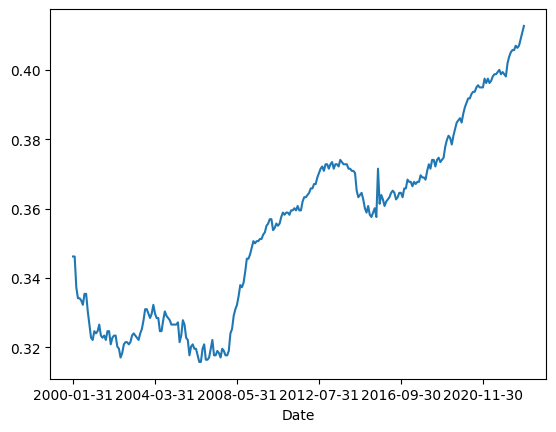

In [117]:
(tmp.isna().sum(axis=1)/1580).sort_index().plot()

In [21]:
#complete_df = pd.DataFrame(columns=['Instrument', 'Price Close', 'Date','CallDate'])
#for date in list(map(str,dates))[265:]:
#    returned_df,err = ek.get_data(f'0#.STOXX({date})',fields=['TR.PriceClose','TR.PriceClose.date'],parameters={'SDate':date,'Curn':'EUR'})
#    returned_df['CallDate'] = date
#    complete_df = pd.concat([complete_df,returned_df],axis=0)
#    print(f'completed loop for {date}')

completed loop for 2022-02-01
completed loop for 2022-03-01
completed loop for 2022-04-01
completed loop for 2022-05-01
completed loop for 2022-06-01
completed loop for 2022-07-01
completed loop for 2022-08-01
completed loop for 2022-09-01
completed loop for 2022-10-01
completed loop for 2022-11-01
completed loop for 2022-12-01
completed loop for 2023-01-01


<AxesSubplot: >

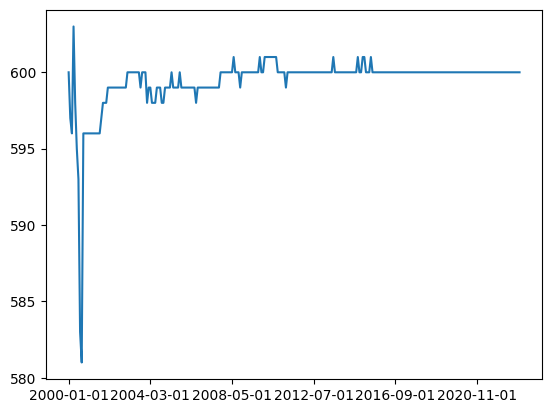

In [36]:
complete_df.CallDate.value_counts().sort_index().plot()

In [39]:
complete_df.to_csv('priceclose_complete.csv')

In [46]:
pivoted_test=complete_df.reset_index().pivot(index='CallDate',columns='Instrument',values='Price Close')

<AxesSubplot: xlabel='CallDate'>

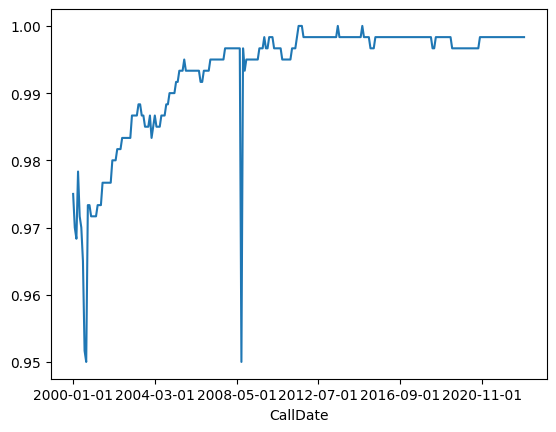

In [51]:
(pivoted_test.T.notna().sum()/600).plot()

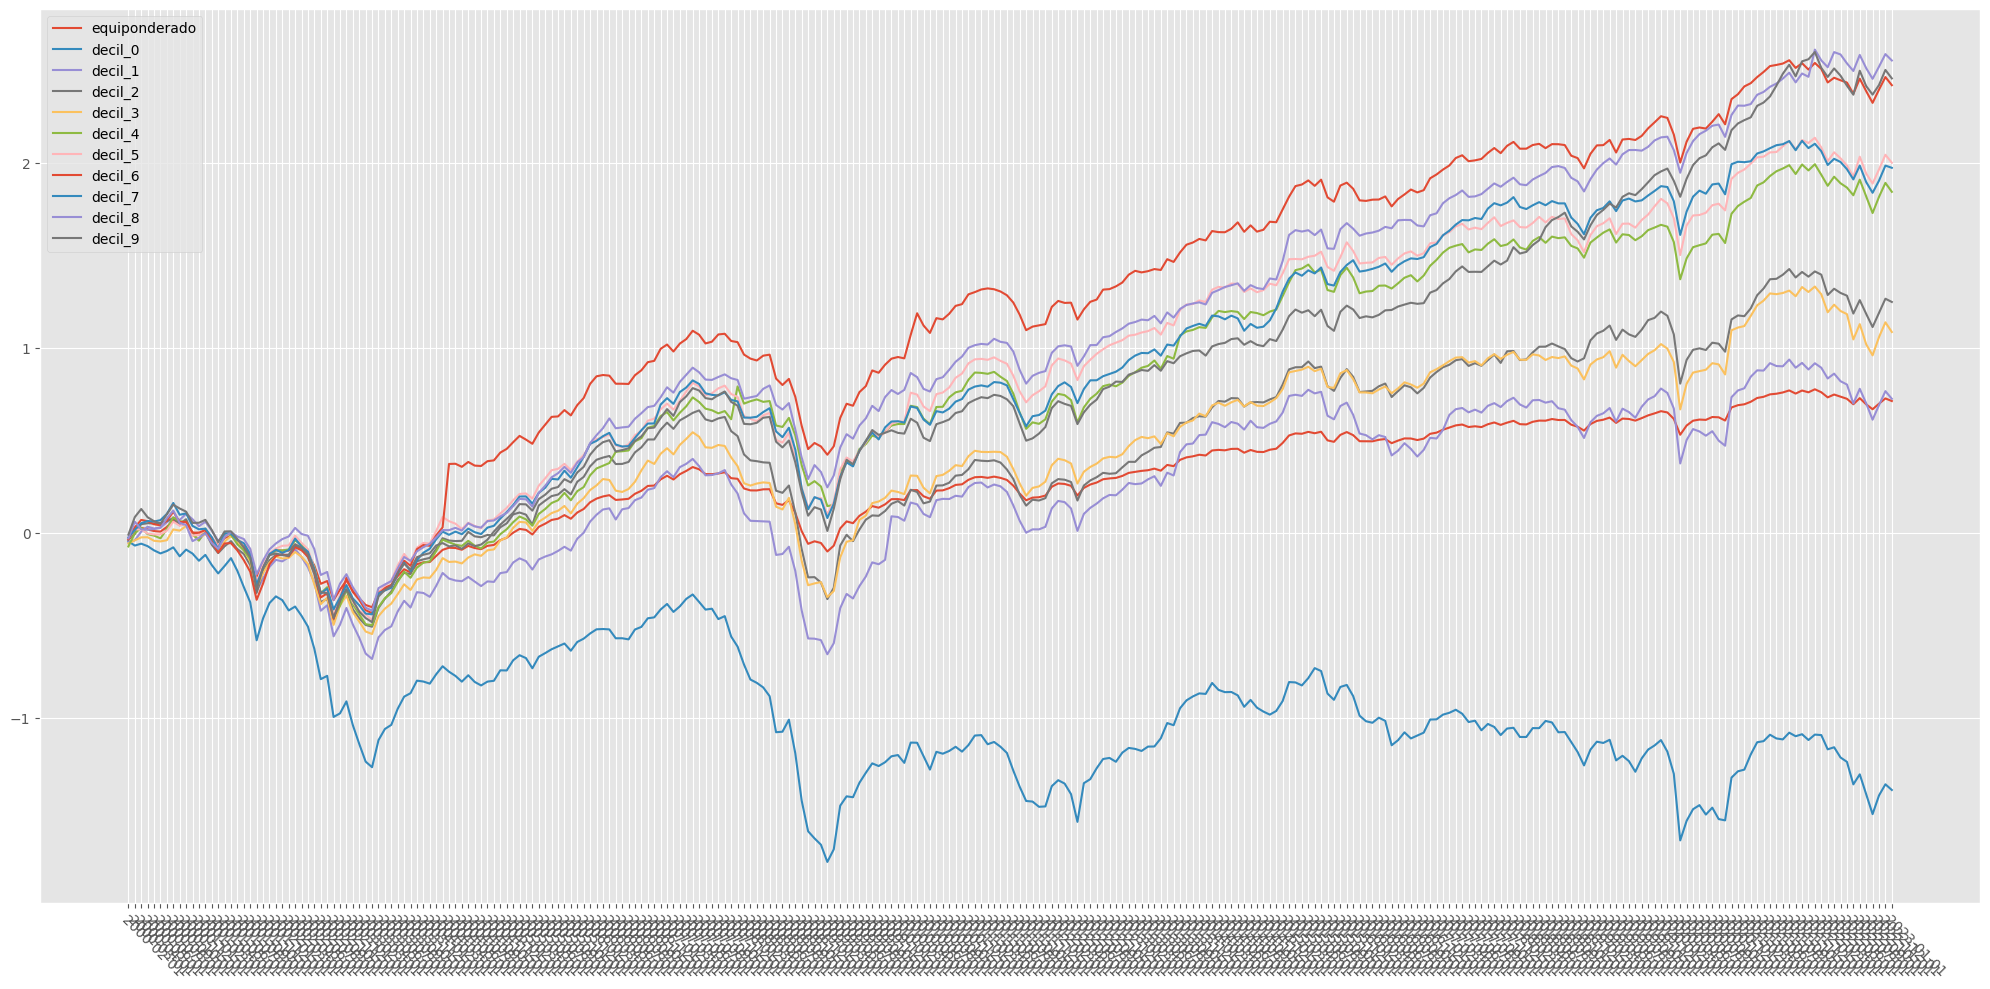

In [68]:
ranked_df = pivoted_test.T
###### HAY QUE HACER DE FORMA VECTORIZADA #########
for date,prices in zip(pivoted_test.index,pivoted_test.astype(float).values):
    ranked_df[date] = pd.qcut(prices,10,duplicates='drop',labels=False)
ranked_df
#### decil 0 tiene los valores mas bajos y el 9 los mas altos ####
def deciles_lists(df):
    diccionario = {}
    for i in range(10):
        diccionario[f'decil_{i}'] = {}
        for date,ranks in df.items():
            diccionario[f'decil_{i}'][date] = ranks.loc[ranks == i].index.tolist()
    return diccionario
deciles_dict = deciles_lists(ranked_df)
rentabilidad_acciones_df = pivoted_test.pct_change()
deciles_df = pivoted_test.quantile(q=np.arange(0.1,1,0.1),axis=1)
rentabilidad_acciones_df
rentabilidades_dict = {}
rentabilidades_dict['equiponderado'] = {}
for decil,fechas in deciles_dict.items():
    rentabilidades_dict[decil] = {}
    for fecha, stocks in fechas.items():
        rentabilidades_dict[decil][fecha] = rentabilidad_acciones_df.loc[fecha,stocks].mean()
        rentabilidades_dict['equiponderado'][fecha] = rentabilidad_acciones_df.loc[fecha].mean()
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
for decil in rentabilidades_dict:
    plt.plot(list(rentabilidades_dict['decil_0'].keys())[1:],np.array(list(rentabilidades_dict[decil].values())[1:]).cumsum(),label=decil)
plt.xticks(rotation=-45,fontsize=10,ha='left',rotation_mode='anchor')
plt.legend()
plt.tight_layout()